# Linear Insights: Unveiling Relationships Through Pure Math

**Linear Regression** is a statistical method used to determine the relationship between a dependent variable and one or more independent variables. In machine learning, this relationship helps predict an event's outcome based on the data points of the independent variables.

Linear Regression falls under supervised learning, a type of machine learning where the model is trained on labeled data. In supervised learning, the algorithm learns from the input-output pairs in the training dataset to make predictions.

**Objective:** The primary goal of Linear Regression is to establish a relationship that can predict the value of a dependent variable (also called the target variable) based on the independent variables (also called features or predictor). The relation is usually a straight line that best fits the different data points as close as possible. The output is of a continuous form, i.e., numerical value.

The line can be expressed using the equation:
$$𝑦 = mX + b$$
where: 
- $y - \text{is the dependent variable (the value to be predicted),}$
- $X - \text{is the independent variable (the predictor),}$
- $m - \text{is the slope of the line (indicating the relationship strength),}$
- $b - \text{is the y-intercept (the value of $y$ when $X$ is zero).}$

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Next, in order to build a linear regression, we are going to need some data.

We can now take a look at this data:

In [5]:
df = pd.read_csv('real_estate_price_size.csv')
df.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


While this data frame provides all necessary information, it is usually a good idea to plot our data to attain a more intuitive understanding of the relationship between our variables x and y:

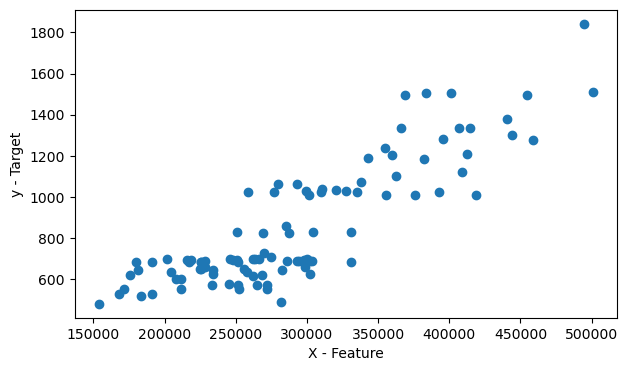

In [7]:
plt.figure(figsize = (7,4))

plt.scatter(x='price', y='size', data=df)
plt.xlabel('X - Feature')
plt.ylabel('y - Target')
plt.show()

In [8]:
df.corr()

,price,size
price,1.000000,0.862983
size,0.862983,1.000000


There seems to exist a linear relationship between size and price.

We need to find the best line of fit that aligns with the data points as much as possible by minimizing any type of error occurring. The algorithm finds the best-fitting line by adjusting the slope $m$ and intercept $b$ to minimize the sum of the squared differences between the actual data points and the predicted values. This method is called the **Least Squares Method**.


### How to find the `Slope` and `Intercept` that fit our data points

To answer this question, we need to introduce residuals.

<p align="center">
  <img src="https://github.com/user-attachments/assets/ffb84640-07bf-4e7f-9845-35bad06bc665" alt="Residual Graph">
</p>

*`Residuals`* refer to the differences between observed values and those predicted by a model. Residuals describe how much your estimate of a data point is off.

$$\text{Residual}
=
\text{Observed Value} 
−
\text{Predicted Value}
\implies d = y - \hat{y}
$$

$$ E = d_1 + d_2 + \cdots + d_n$$
$$ E = d_1^2 + d_2^2 + \cdots + d_n^2 = \sum_{i=1}^{n}d_i^2 = \sum_{i=1}^{n}(y_i - \hat{y_i})^2$$
$$\text{Note: } \quad \hat{y_i} = mx_i + b$$
$$ \text{Hence, } E =  \sum_{i=1}^{n}(y_i - mx_i - b)^2 $$
To fit our regression as close to our data as possible, we naturally want to minimize these residuals over all of our data points. This can be expressed mathematically using the following formula:
$$ Min \quad E(m,b) =  \sum_{i=1}^{n}(y_i - mx_i - b)^2 $$



To obtain the `Intercept`, we differentiate with respect to $b$
$$\dfrac{\partial E}{\partial b} = \dfrac{\partial }{\partial b}  \sum_{i=1}^{n}(y_i - mx_i - b)^2 =0 $$
$$  \sum_{i=1}^{n}\dfrac{\partial }{\partial b} (y_i - mx_i - b)^2 =0$$
$$ - 2 \sum_{i=1}^{n}(y_i - mx_i - b)= 0 $$
$$\sum_{i=1}^{n}(y_i - mx_i - b)= 0 $$
Taking the average 
$$\sum_{i=1}^{n}\dfrac{y_i}{n} - \sum_{i=1}^{n}\dfrac{mx_i}{n} - \sum_{i=1}^{n}\dfrac{b}{n} = 0$$
$$ \bar{y} - m\bar{x} - b = 0$$
$$b =  \bar{y} - m\bar{x}$$
$$\text{Which is the \textbf{Intercept}}$$

To obtain the `Slope`, we differentiate with respect to $m$
$$\dfrac{\partial E}{\partial m} = \sum_{i=1}^{n}\dfrac{\partial }{\partial m} (y_i - mx_i - b)^2 =0 $$
$$\text{ Since } b =  \bar{y} - m\bar{x}$$
$$\sum_{i=1}^{n}\dfrac{\partial }{\partial m} (y_i - mx_i - \bar{y} + m\bar{x})^2 =0$$
$$2\sum_{i=1}^{n} (y_i - mx_i - \bar{y} + m\bar{x})(-x_i + \bar{x}) =0$$
$$\sum_{i=1}^{n} \left[(y_i - \bar{y}) -m(x_i - \bar{x})\right](x_i - \bar{x}) =0$$
$$\sum_{i=1}^{n} \left[(y_i - \bar{y})(x_i - \bar{x})- m(x_i - \bar{x})^2\right] =0$$
$$\sum_{i=1}^{n} (y_i - \bar{y})(x_i - \bar{x})= m(x_i - \bar{x})^2 =0$$
$$m= \dfrac{\sum_{i=1}^{n} (y_i - \bar{y})(x_i - \bar{x})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}$$
$$\text{Which is the \textbf{Slope}}$$

Let’s compute our formula



In [15]:
# Model Computation
class simple_linear_regression:
    def __init__ (self):
        self.m = None
        self.b = None
    # Fit Method
    def fit(self, X, y):
        num = 0
        den = 0
        for i in range(X.shape[0]):
            num = num + (X[i] - X.mean())*(y[i] - y.mean())
            den = den + (X[i] - X.mean()) * (X[i] - X.mean())
        # Calculate Slope and Intercept
        self.m = num/den
        self.b = y.mean() - (self.m * X.mean())

        print("Slope (m):", self.m)
        print("Intercept (b):", self.b)
    # To make predictions
    def predict(self, X):
        y_pred = self.m * X + self.b
        return y_pred
    # plot our regression line
    def plot(self, X, y):
        plt.figure(figsize = (7,5))
        plt.scatter(X, y, color='blue', label='Data Points')
        plt.plot(X, self.predict(X), color='red', label='Regression (Prediction) Line')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Simple Linear Regression')
        plt.legend()
        plt.show()

In [16]:
# Split our dataset
X = df.iloc[:, 0].values
y = df.iloc[:, -1].values

In [17]:
# using our model
model = simple_linear_regression()

In [18]:
model.fit(X, y)

Slope (m): 0.0033369629111027776
Intercept (b): -122.33492122980215


We now have the equation of our regression line $y = 0.003337X - 122.3349$.

Using this equation to predict our data

In [20]:
y_pred = model.predict(X) # y_pred = self.m * X + self.b

View from the regression equation the prediction of y-values from the x-values

In [22]:
prediction_table = pd.DataFrame({
    'X': X,                        # Column for input values (X)
    'Original y_value': y,         # Column for actual y values
    'Predicted y': y_pred          # Column for predicted y values
})

prediction_table.head(10)

,X,Original y_value,Predicted y
0,234314.144,643.09,659.562687
1,228581.528,656.22,640.433160
2,281626.336,487.29,817.441717
3,401255.608,1504.75,1216.640161
4,458674.256,1275.46,1408.244059
5,245050.280,575.19,695.388774
6,265129.064,570.89,762.390932
7,175716.480,620.82,464.024455
8,331101.344,682.26,982.537984
9,218630.608,694.52,607.227309


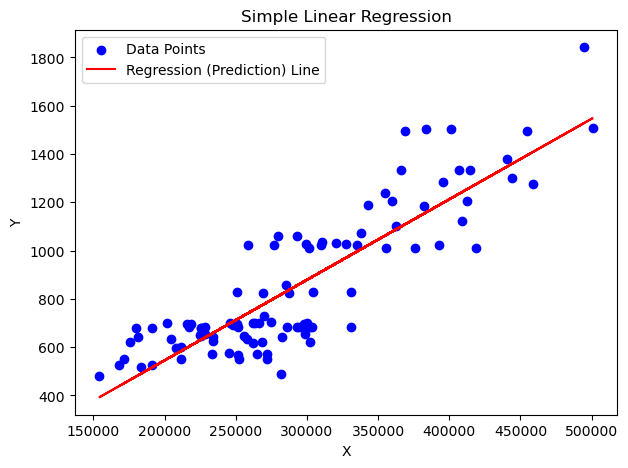

In [23]:
# Plot the data points and the regression line
model.plot(X, y)

### Implementation with Sklearn Linear Model

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [26]:
X = X.reshape(-1, 1)

In [27]:
model.fit(X, y)

LinearRegression()

In [28]:
print("Slope (m):", model.coef_[0])
print("Intercept (b):", model.intercept_)

Slope (m): 0.003336962911102777
Intercept (b): -122.33492122980192


Our mathematical implementation of linear regression is functioning perfectly! The next phase of our project involves evaluating the performance of our regression model by applying various regression metrics. We will delve into the quantitative assessment of our model’s accuracy and effectiveness, focusing on metrics such as 
- Mean Absolute Error,
- Mean Squared Error,
- Root Mean Squared Error,
- R-squared,
- and Adjusted R-squared. 

# Regression Metrics

`Regression metrics` are quantitative measures used to evaluate the performance of a regression model. Scikit-learn provides several metrics, each with its strengths and limitations, to assess how well a model fits the data. It is crucial to obtain accurate and approximate results on unseen data; otherwise, the model is of no practical use.

To build and deploy a generalized model, it is essential to evaluate the model using various metrics. This process helps us optimize performance, fine-tune the model, and achieve better results.

The effectiveness of a regression model must be reported in terms of error in its predictions. We need to understand how close the predictions are to the actual values. Error metrics address this by summarizing, on average, how close the predictions are to the expected values.




In [31]:
error = y - y_pred

In [32]:
prediction_table = pd.DataFrame({
    'X': X[:, 0],                        
    'Original $y$': y,         
    'Predicted $\\hat{y}$': y_pred,         
    'Error ($y -\\hat{y}$)' : error
})

prediction_table.head(10)

,X,Original $y$,Predicted $\hat{y}$,Error ($y -\hat{y}$)
0,234314.144,643.09,659.562687,-16.472687
1,228581.528,656.22,640.433160,15.786840
2,281626.336,487.29,817.441717,-330.151717
3,401255.608,1504.75,1216.640161,288.109839
4,458674.256,1275.46,1408.244059,-132.784059
5,245050.280,575.19,695.388774,-120.198774
6,265129.064,570.89,762.390932,-191.500932
7,175716.480,620.82,464.024455,156.795545
8,331101.344,682.26,982.537984,-300.277984
9,218630.608,694.52,607.227309,87.292691


### 1. Mean Absolute Error (MAE):
Mean Absolute Error (MAE) is a commonly used metric in regression analysis. It measures the average absolute discrepancies between the actual values and the predicted values of a dataset. MAE provides an understanding of the model’s average absolute error in making predictions.

In other words, MAE tells us how close the predictions are to the actual values on average. Lower MAE values indicate that the model’s predictions are close to the actual values, signifying good predictive performance. Conversely, higher MAE values suggest that the model’s predictions are further from the actual values, indicating poor predictive performance.

$$ \text{MAE } = \dfrac{|-16.472687| + |15.786840|  + |-330.151717| + \cdots}{100}$$
$$ \text{MAE } = \dfrac{|y_1 - \hat{y_1}| + |y_2 - \hat{y_2}| + \cdots + |y_n - \hat{y_n}|}{n} $$
$$\text{MAE } = \sum_{i=1}^{n} \dfrac {|y_i - \hat{y_i}|}{n}$$

Let’s now see how to implement MAE in Python.

In [35]:
from sklearn.metrics import mean_absolute_error
print ('MAE: ', mean_absolute_error(y, y_pred))

MAE:  121.96968718331632


#### Advantages of MAE
- The MAE you get is in the same unit as the output variable.
- All errors are treated equally, so the metric is robust to outliers.
#### Disadvantages of MAE
- As the formula contains absolute values, the graph of MAE is not differentiable so we have to apply various optimizers like Gradient descent which can be differentiable.

Now to overcome the disadvantage of MAE next metric came as MSE.

### 2. Mean Square Error (MSE):
It represents the squared distance between actual and predicted values. we perform squared to avoid the cancellation of negative terms and it is the benefit of MSE.

$$ \text{MSE } = \dfrac{(-16.472687)^2 + (15.786840)^2  + (-330.151717)^2 + \cdots}{100}$$
$$ \text{MSE } = \dfrac{(y_1 - \hat{y_1})^2 + (y_2 - \hat{y_2})^2 + \cdots + (y_n - \hat{y_n})^2}{n}$$
$$\text{MSE } = \sum_{i=1}^{n} \dfrac {(y_i - \hat{y_i})^2}{n}$$

Let’s now see how to implement MSE in Python.

In [39]:
from sklearn.metrics import mean_squared_error
print('MSE: ', mean_squared_error(y, y_pred))

MSE:  22432.757266051878


#### Advantages of MSE

- The graph of MSE is differentiable, so you can easily use it as a loss function.

#### Disadvantages of MSE

- The value you get after calculating MSE is a squared unit of output. for example, the output variable is in meter(m) then after calculating MSE the output we get is in meters squared.
- If you have outliers in the dataset then it penalizes the outliers most and the calculated MSE is bigger. So, in short, It is not Robust to outliers which was an advantage in MAE.

### 3. Root Mean Square Error (RMSE): 
Root Mean Squared Error (RMSE), as its name suggests, is the square root of the mean squared error. Like the Mean Absolute Error (MAE), RMSE is used to determine how close predictions are to actual values on average. However, RMSE has a key distinction.

RMSE is particularly useful for identifying large errors or deviations in predictions. It can highlight whether the model significantly overestimated (predicted values much higher than actual) or underestimated (predicted values much lower than actual) certain points. This is because squaring the residuals before averaging them places a greater penalty on larger errors.

When to Use RMSE:

- Concern for Large Errors: RMSE is ideal if you are particularly concerned about large errors in your predictions. Because squaring the residuals increases the impact of larger errors, RMSE provides a clear indication of their presence.
- Comparing Models: RMSE is a popular evaluation metric for regression problems, especially when comparing models that use the same dataset but different algorithms. The model with the lowest RMSE is typically considered the better model.
Key Points:

There is no specific range for RMSE, but generally, the lower the RMSE, the better the model's performance.
RMSE not only measures the average error in predictions but also gives insight into the impact of large errors.

$$RMSE = \sqrt {\sum_{i=1}^{n} \dfrac {(y_i - \hat{y_i})^2}{n}}$$
$$RMSE = \sqrt {MSE}$$

In [43]:
print('RMSE: ', np.sqrt(mean_squared_error(y, y_pred)))

RMSE:  149.775689836675


We can see that the RMSE value is larger than the MAE. This is a result of some large errors in the dataset.

#### Disadvantages of RMSE
- It is not that robust to outliers as compared to MAE

### 4. $R^2$ Score:
**$R^2$ Score**, also known as the `Coefficient of Determination` or `Goodness of Fit`, is a metric that evaluates the performance of a regression model. Unlike metrics like MAE or MSE, which provide a measure of error or loss, the R2 score indicates how well your model's predictions match the actual data.

One of the key advantages of the R2 score is its independence from the context of the data. While MAE and MSE values are influenced by the scale of the data, the $R^2$ score provides a standardized measure that can be easily interpreted regardless of the specific dataset.

The R2 score gives you a baseline to compare your model's performance against a simple mean model. Essentially, it measures how much better (or worse) your regression line is compared to a horizontal line representing the mean of the target values. This comparison helps you understand the proportion of the variance in the dependent variable that is predictable from the independent variables.

$$R^2 = 1 - \dfrac{\sum(y_i - \hat{y_i})^2}{\sum(y_i - \bar{y_i})^2}$$

### Interpreting the $R^2$ Score
The $R^2$ score, or Coefficient of Determination, provides insight into the performance of a regression model by indicating how well the model's predictions match the actual data. Here’s how to interpret different $R^2$ scores:

**$R^2$ Score of 0:**

When the $R^2$ score is zero, it means that the regression model's predictions are no better than simply predicting the mean of the target values.
In other words, the regression line overlaps with the mean line, indicating that the model fails to capture any of the variance in the data. This suggests that the model has the worst possible performance and cannot leverage the information in the input features to predict the output.

**$R^2$ Score of 1:**

An $R^2$ score of 1 indicates that the regression model perfectly fits the data. This means that the regression line captures all the variance in the target variable, with no errors in predictions.
While this is theoretically possible, it is very unlikely in real-world scenarios due to the presence of noise and variability in the data. A perfect fit usually suggests overfitting, where the model captures not only the underlying pattern but also the noise in the training data.

**$R^2$ Score between 0 and 1:**

Most real-world models will have an $R^2$ score between 0 and 1. For example, an $R^2$ score of 0.74 means that the model explains 74% of the variance in the target variable.
This indicates that the model performs well and can predict the target variable with a reasonable degree of accuracy, but there is still room for improvement as 26% of the variance is unexplained.

In [48]:
from sklearn.metrics import r2_score
print('R-squared: ', r2_score(y, y_pred))

R-squared:  0.7447391865847586


**Limitations of the $R^2$ Score and the Need for Adjusted $R^2$**

The $R^2$ score is a useful metric for evaluating the goodness of fit of a regression model. However, it has a significant limitation:

- **Inflation with Additional Features:** The $R^2$ score never decreases when new features are added to the model. This is because $R^2$ assumes that adding more features will either increase the explained variance or leave it unchanged. However, this can be misleading.
- **Irrelevant Features:** When irrelevant or redundant features are added to the model, the $R^2$ score might still increase. This can give the false impression that the model is improving, even though these features do not actually contribute to better predictions and may lead to overfitting.

To address this issue, Adjusted $R^2$ was introduced. Adjusted $R^2$ accounts for the number of predictors in the model and adjusts the $R^2$ score accordingly.


### 5. $R^2$ Adjusted:

Adjusted $R^2$ modifies the $R^2$ score to penalize the addition of irrelevant features:

- **Adjusts for the Number of Features:** It introduces a penalty for the number of predictors in the model. This means that adding a new feature will only increase the Adjusted $R^2$ if the new feature improves the model more than would be expected by chance.
- **Prevents Overfitting:** By adjusting for the number of predictors, Adjusted $R^2$ discourages the inclusion of irrelevant variables, thus helping to maintain a more parsimonious model.

The Adjusted $R^2$ is calculated as follows:

$$ Adjusted R^2 = 1 - \left[ \dfrac{(1-R^2)(n-1)}{n-k-1} \right]$$

Where:\
**$n$** is the number of observations\
**$k$** is the number of predictors\
**$R^2$**  is the original coefficient of determination

In [52]:
n = df.shape[0]
k = 1
r2 = r2_score(y, y_pred)
adj = 1 - ((1-r2)*(n-1))/(n-k-1)

In [53]:
adj

0.742134484407052

### Adding Not correlated feature

In [55]:
df_new = df.copy()

In [56]:
df_new.shape

(100, 2)

In [57]:
df_new['random_feature'] = np.random.random(df_new.shape[0])
df_new = df_new[['size', 'random_feature', 'price']]
df_new.head(2)

,size,random_feature,price
0,643.09,0.524976,234314.144
1,656.22,0.540977,228581.528


In [58]:
np.corrcoef(df_new['price'], df_new['random_feature'])[0, 1]

-0.17430282560378474

In [59]:
X = df_new.iloc[:, 0:2].values
y = df_new.iloc[:, -1].values

In [60]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [61]:
print('R-squared: ', r2_score(y, y_pred))

R-squared:  0.7633914854882642


In [62]:
n = df.shape[0]
k = 2
r2 = r2_score(y, y_pred)
adj = 1 - ((1-r2)*(n-1))/(n-k-1)
print('Adjusted: ', adj)

Adjusted:  0.7585129594158573


We then add a non-correlated feature to the model. This new feature does not have any meaningful relationship with the dependent variable.

- **$R^2$ Score:** Upon adding the non-correlated feature, the $R^2$ score slightly increase from 0.7447 to 0.7449. This is because the $R^2$ score tends to increase or remain constant with the addition of more features, regardless of their relevance.
- **Adjusted $R^2$ Score:** In contrast, the Adjusted $R^2$ score takes into account the number of predictors and penalizes the inclusion of irrelevant features. Therefore, after adding the non-correlated feature, the Adjusted $R^2$ score decrease from 0.7421 to 0.7396, indicating that the new feature does not contribute to the model's explanatory power and may lead to overfitting.

### Adding Correlated Features

In [65]:
df2 = df.copy()

In [66]:
df2['new_feature'] = df2['price']*(np.random.randint(2, 5, df2.shape[0])/2)


In [67]:
df2 = df2[['size', 'new_feature', 'price']]
df2.head(2)

,size,new_feature,price
0,643.09,351471.216,234314.144
1,656.22,457163.056,228581.528


In [68]:
np.corrcoef(df2['price'], df2['new_feature'])[0, 1]

0.6894050027796154

In [69]:
X = df2.iloc[:, 0:2].values
y = df2.iloc[:, -1].values

In [70]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [71]:
print('R-squared: ', r2_score(y, y_pred))

R-squared:  0.8103419145964094


In [72]:
n = df.shape[0]
k = 2
r2 = r2_score(y, y_pred)
adj = 1 - ((1-r2)*(n-1))/(n-k-1)
adj

0.8064314386087065

Next, we add a correlated feature to the original model. This new feature has a strong relationship with the dependent variable.

- **$R^2$ Score:** Adding this correlated feature increases the $R^2$ score from 0.7447 to 0.7828. This significant increase reflects the feature's relevance and its ability to explain more variance in the dependent variable.
- **Adjusted $R^2$ Score:** Since the correlated feature provides meaningful information, the Adjusted $R^2$ score also increases, from 0.7421 to 0.7778. This indicates that the new feature genuinely improves the model's performance without adding unnecessary complexity.